In [3]:
# -- PACKAGE IMPORTS --
#
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np
import os 
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as col
# sns.set_theme(style="whitegrid")

In [4]:
# -- FUNCTION TO GET THE MODIFIED PARAMETER VALUE --
#
def get_modified_value(df_base_param, df_param):

    df_base_param_keys   = df_base_param.columns
    df_base_param_values = df_base_param.to_numpy()[0]
    df_param_keys        = df_param.columns
    df_param_values      = df_param.to_numpy()[0]

    key_params           = ["radiality", "EV", "EHP", "storage", "Storage_cost", "network_reconfig", "bilevel", "PV_CAPA", "PVC","DSOEC","EIC","EEC","GCC", "weight_I"]
  
    for (i, (v1, v2)) in enumerate(zip(df_param_values, df_base_param_values)):
        key = df_param_keys[i]
        if  key in key_params and v1 != v2:
            if key == "storage":
                value_changed_param = df_param_values[df_param_keys == "Storage_cost"][0]
                key_changed_param   = "Storage_cost"
            else:
                value_changed_param = v1
                key_changed_param   = key

            return key_changed_param, value_changed_param

    return None 

In [5]:
# -- DEFINITION OF THE KEYS FOR THE DIFFERENT VALUES TO GET --
#
key_params          = [ "radiality", "EV", "EHP", "storage", "Storage_cost",
                        "network_reconfig", "bilevel", "PV_CAPA", "PVC", 
                        "DSOEC","EIC","EEC","GCC", "weight_I"]

key_solution_KPIs   = ["Gap", "Solve Time",]
key_network_KPIs    = [ "Substation 1 capacity", "Substation 2 capacity", 
                        "Nb lines built", "Nb lines cond 1", "Nb lines cond 2",
                        "Nb lines cond 3", "Nb lines cond 4", "PV capacity"]

key_KPIs            =  ["LCOE grid", "CAPEX", 
                        "OPEX", "UPVC", "UGCC",
                        "UNEEC", "USS", "USC"]

box_plot_USS_keys   = [ "Mean Self Consumption User 1",
                        "Mean Self Sufficiency User 2",
                        "Mean Self Sufficiency User 3",
                        "Mean Self Sufficiency User 4",
                        "Mean Self Sufficiency User 5",
                        "Mean Self Sufficiency User 6",
                        "Mean Self Sufficiency User 7",
                        "Mean Self Sufficiency User 8",
                        "Mean Self Sufficiency User 9",
                        "Mean Self Sufficiency User 10",
                        "Mean Self Sufficiency User 1",
                        "Mean Self Sufficiency User 12",
                        "Mean Self Sufficiency User 13",
                        "Mean Self Sufficiency User 14",
                        "Mean Self Sufficiency User 15",
                        "Mean Self Sufficiency User 16",
                        "Mean Self Sufficiency User 17",
                        "Mean Self Sufficiency User 18",
                        "Mean Self Sufficiency User 19",
                        "Mean Self Sufficiency User 20",
                        "Mean Self Sufficiency User 21"]

box_plot_USC_keys   = [ "Mean Self Consumption User 1",
                        "Mean Self Consumption User 2",
                        "Mean Self Consumption User 3",
                        "Mean Self Consumption User 4",
                        "Mean Self Consumption User 5",
                        "Mean Self Consumption User 6",
                        "Mean Self Consumption User 7",
                        "Mean Self Consumption User 8",
                        "Mean Self Consumption User 9",
                        "Mean Self Consumption User 10",
                        "Mean Self Consumption User 1",
                        "Mean Self Consumption User 12",
                        "Mean Self Consumption User 13",
                        "Mean Self Consumption User 14",
                        "Mean Self Consumption User 15",
                        "Mean Self Consumption User 16",
                        "Mean Self Consumption User 17",
                        "Mean Self Consumption User 18",
                        "Mean Self Consumption User 19",
                        "Mean Self Consumption User 20",
                        "Mean Self Consumption User 21"]

all_KPIs            = [ "Model",
                        "Objective",
                        "Gap",
                        "Solve Time",
                        "Time periods",
                        "Energy consumed",
                        "Peak Demand",
                        "Peak sub max",
                        "Peak sub min",
                        "Nb lines built",
                        "Nb substation",
                        "Nb lines cond 1",
                        "Nb lines cond 2",
                        "Nb lines cond 3",
                        "Nb lines cond 4",
                        "DSO fixed line",
                        "DSO fixed sub",
                        "DSO loss",
                        "DSO future value",
                        "DSO revenues",
                        "User",
                        "PV",
                        "Grid connection",
                        "Energy imported",
                        "Energy exported",
                        "PV capacity",
                        "PV penetration (v1)",
                        "PV penetration (v2)",
                        "PV energy",
                        "PV potential",
                        "Mean Global Self sufficiency/day",
                        "Mean Global Self Consumption/day",
                        "Mean Global Production ratio",
                        "LCOE pv",
                        "Mean Self Sufficiency User 1",
                        "Mean Self Sufficiency User 2",
                        "Mean Self Sufficiency User 3",
                        "Mean Self Sufficiency User 4",
                        "Mean Self Sufficiency User 5",
                        "Mean Self Sufficiency User 6",
                        "Mean Self Sufficiency User 7",
                        "Mean Self Sufficiency User 8",
                        "Mean Self Sufficiency User 9",
                        "Mean Self Sufficiency User 10",
                        "Mean Self Sufficiency User 11",
                        "Mean Self Sufficiency User 12",
                        "Mean Self Sufficiency User 13",
                        "Mean Self Sufficiency User 14",
                        "Mean Self Sufficiency User 15",
                        "Mean Self Sufficiency User 16",
                        "Mean Self Sufficiency User 17",
                        "Mean Self Sufficiency User 18",
                        "Mean Self Sufficiency User 19",
                        "Mean Self Sufficiency User 20",
                        "Mean Self Sufficiency User 21",
                        "Mean Self Consumption User 1",
                        "Mean Self Consumption User 2",
                        "Mean Self Consumption User 3",
                        "Mean Self Consumption User 4",
                        "Mean Self Consumption User 5",
                        "Mean Self Consumption User 6",
                        "Mean Self Consumption User 7",
                        "Mean Self Consumption User 8",
                        "Mean Self Consumption User 9",
                        "Mean Self Consumption User 10",
                        "Mean Self Consumption User 11",
                        "Mean Self Consumption User 12",
                        "Mean Self Consumption User 13",
                        "Mean Self Consumption User 14",
                        "Mean Self Consumption User 15",
                        "Mean Self Consumption User 16",
                        "Mean Self Consumption User 17",
                        "Mean Self Consumption User 18",
                        "Mean Self Consumption User 19",
                        "Mean Self Consumption User 20",
                        "Mean Self Consumption User 21",
                        "Mean Production Ratio User 1",
                        "Mean Production Ratio User 2",
                        "Mean Production Ratio User 3",
                        "Mean Production Ratio User 4",
                        "Mean Production Ratio User 5",
                        "Mean Production Ratio User 6",
                        "Mean Production Ratio User 7",
                        "Mean Production Ratio User 8",
                        "Mean Production Ratio User 9",
                        "Mean Production Ratio User 10",
                        "Mean Production Ratio User 11",
                        "Mean Production Ratio User 12",
                        "Mean Production Ratio User 13",
                        "Mean Production Ratio User 14",
                        "Mean Production Ratio User 15",
                        "Mean Production Ratio User 16",
                        "Mean Production Ratio User 17",
                        "Mean Production Ratio User 18",
                        "Mean Production Ratio User 19",
                        "Mean Production Ratio User 20",
                        "Mean Production Ratio User 21",
                        "Grid capacity",
                        "Energy bought from grid",
                        "Energy sold to grid",
                        "Substation 1 capacity",
                        "Substation 2 capacity",
                        "loss",
                        "LCOE grid",
                        "CAPEX",
                        "OPEX",
                        "UPVC",
                        "UGCC",
                        "UNEEC",
                        "USS",
                        "USC"]

all_units = ['-', 'kEUR/year', '%', 'sec.', '-', '-', '-', '-', '-', '-', '-',
            '-', '-', '-', '-', 'kEUR', 'kEUR', 'kEUR', 'kEUR', 'kEUR',
            'kEUR/year', 'kEUR/year', 'kEUR/year', 'kEUR/year', 'kEUR/year',
            'MVA', '%/year', '%/year', 'MWh/year', 'MWh/year', 'average, [%]',
            'average, [%]', 'average, [%]', 'kEUR/MWh', '%', '%', '%', '%',
            '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%',
            '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%',
            '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%',
            '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%', '%',
            '%', '%', '%', '%', '%', '%', '%', 'average, MVA', 'MWh/year',
            'MWh/year', 'MVA', 'MVA', 'MWh/year', 'kEUR/MWh', 'M€/y', 'k€/y',
            'M€/y', 'M€/y', 'M€/y', '%', '%']

In [6]:
# -- FETCHING THE DATA FROM THE EXCEL FILES --
# Path
cwd       = Path.cwd()
simu_path = Path(cwd, 'simulations')
# Constant
simu_replicates = [2, 7, 9, 11, 15, 18, 21, 24, 27, 30]
simu_indices    = [i for i in range(0,33) if i not in simu_replicates]
#print(simu_indices)


# Directory simu
directories = list()
for name in ["single_commodity", "multi_commodity", "spanning_tree"]:
    if name != "spanning_tree":
        for i in simu_indices:
            directory = "simu_"+name+"_"+str(i)
            temp_dir = Path(simu_path, directory)
            if temp_dir.is_dir():
                directories.append(temp_dir)
    else:
        for i in range(0,23):
            directory = "simu_"+name+"_"+str(i)
            temp_dir = Path(simu_path, directory)
            if temp_dir.is_dir():
                directories.append(temp_dir)


excel_files = [Path(d, 'results.xlsx') for d in directories]
print(excel_files[46:69])
df_param, df_results = list(), list()
for i, e in enumerate(excel_files):
    df_param.append(pd.read_excel(e, index_col=0, header=None, skiprows=[0]+[i for i in range(34,112)], usecols=[0,1]).transpose())
    temp_xlsx = (pd.read_excel(e, index_col=0, header=None, usecols=[3,4,5]).transpose())
    if temp_xlsx.columns[0] == "failure":
        temp_xlsx = pd.DataFrame(columns = [all_KPIs, all_units], data = np.reshape(["-" for i in range(0, len(all_KPIs))], (1,111)))
        df_results.append(temp_xlsx)
    else:
        temp_xlsx.fillna('-', inplace=True)
        temp_xlsx.columns = [all_KPIs, all_units]
        temp_xlsx.keys    = [all_KPIs, all_units]
        temp_xlsx.data    = temp_xlsx.values[1] 

        # Retreives the index of the first line with the bullshit
        index_bullshit = temp_xlsx.index[0]

        # Send to hell the bullshit
        temp_xlsx = temp_xlsx.drop([index_bullshit])

        # Append the clean data :-)
        df_results.append(temp_xlsx)

# Concatenation of all the tables
key_params_tab = pd.concat(df_param, axis=0)[key_params]
results_tab    = pd.concat(df_results, axis=0, ignore_index=False)

# Displaying the good ass looking table
display(results_tab[46:69])

# Definition of the base cases
df_param_basecase_single   = df_param[0].copy(deep=True)
# df_results_basecase_single = df_results[0].copy(deep=True)
df_param_basecase_multi    = df_param[len(simu_indices)].copy(deep=True)
# df_results_basecase_multi  = df_results[len(simu_indices)].copy(deep=True)

[PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_DNEP/simulations/simu_spanning_tree_0/results.xlsx'), PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_DNEP/simulations/simu_spanning_tree_1/results.xlsx'), PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_DNEP/simulations/simu_spanning_tree_2/results.xlsx'), PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_DNEP/simulations/simu_spanning_tree_3/results.xlsx'), PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_DNEP/simulations/simu_spanning_tree_4/results.xlsx'), PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_DNEP/simulations/simu_spanning_tree_5/results.xlsx'), PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_DNEP/simulations/simu_spanning_tree_6/results.xlsx'), PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_DNEP/simulations/simu_spanning_tree_7/results.xlsx'), PosixPath('/Users/manoncornet/Documents/University/TFE/Bilevel_

/var/folders/6d/383xgw8s1d1953qz790n3kf80000gn/T/ipykernel_43436/702259001.py:41: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp_xlsx.data    = temp_xlsx.values[1]
/var/folders/6d/383xgw8s1d1953qz790n3kf80000gn/T/ipykernel_43436/702259001.py:41: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp_xlsx.data    = temp_xlsx.values[1]
/var/folders/6d/383xgw8s1d1953qz790n3kf80000gn/T/ipykernel_43436/702259001.py:33: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  temp_xlsx = (pd.read_excel(e, index_col=0, header=None, usecols=[3,4,5]).transpose())
/var/folders/6d/383xgw8s1d1953qz790n3kf80000gn/T/ipykernel_43436/702259001.py:33: FutureWarning: Defining usecols with out of bounds 

,Model,Objective,Gap,Solve Time,Time periods,Energy consumed,Peak Demand,Peak sub max,Peak sub min,Nb lines built,...,Substation 2 capacity,loss,LCOE grid,CAPEX,OPEX,UPVC,UGCC,UNEEC,USS,USC
,-,kEUR/year,%,sec.,-,-,-,-,-,-,...,MVA,MWh/year,kEUR/MWh,M€/y,k€/y,M€/y,M€/y,M€/y,%,%
5,Bilevel,123.6,5.236,1200,48,16580,5.432,5.429,-1.207,21,...,5.72,29.07,0.4562,0.1175,6.104,0.2414,2.17,3.462,0.2125,0.422
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,Bilevel,118.1,0.7723,418.6,48,16580,5.432,5.41,-1.083,21,...,1.524,5.324,0.4562,0.117,1.118,0.2414,2.156,3.477,0.2125,0.4175
5,Single Level,5998,0.1119,58.25,48,16580,5.432,5.429,-1.214,21,...,5.72,29.01,0.4562,0.1176,6.092,0.2414,2.172,3.461,0.2125,0.419
5,Bilevel,121,2.657,1200,48,16580,5.432,5.44,0.3943,21,...,5.731,12.6,0.4431,0.1184,2.646,0,2.371,4.973,0,-1000


In [8]:
# Fetch the results with the best MIP GAP
all_keys_needed = key_solution_KPIs + key_network_KPIs + key_KPIs
all_units_needed =  ['%', 'sec.', 'MVA', 'MVA','-', '-', '-', '-', '-', 'MVA','kEUR/MWh', 'M€/y', 'k€/y',
            'M€/y', 'M€/y', 'M€/y', '%', '%']

results_single   = results_tab[all_keys_needed].iloc[0:23,:].copy(deep=True).reset_index(drop=True)
#display(results_single)

results_multi    = results_tab[all_keys_needed].iloc[23:46,:].copy(deep=True).reset_index(drop=True)

results_spanning = results_tab[all_keys_needed].iloc[46:69,:].copy(deep=True).reset_index(drop=True)


df = pd.DataFrame(columns=[all_keys_needed, all_units_needed], index=range(0,23))

for ((i1, r1),(i2, r2), (i3, r3)) in zip(results_single.iterrows(), results_multi.iterrows(), results_spanning.iterrows()):

    gaps = [r1["Gap"].values, r2["Gap"].values, r3["Gap"].values]
    check_dash = all(map(lambda x: x == '-', gaps))
    #print(check_dash)
    #print(type(r1))
    if check_dash:
        df.iloc[i1, :] = r1.values
    else:
        gaps = list(map(lambda x: float(1000) if x =='-' else float(x), gaps))
        index_min = np.argmin(gaps) # index of the min
        #print(index_min)
        if index_min == 0:
            df.iloc[i1, :] = r1.values
        elif index_min == 1:
            df.iloc[i2, :] = r2.values
        elif index_min == 2:
            df.iloc[i3, :] = r3.values

#display(df)

best_key_solutions = df[key_solution_KPIs].reset_index(drop=True).copy(deep=True)

best_network_solutions = df[key_network_KPIs].reset_index(drop=True).copy(deep=True)

best_results_solutions = df[key_KPIs].reset_index(drop=True).copy(deep=True)

In [9]:
# -- Build the table with the parameters tested (single commodity & multi commodity & spanning tree) --

key_params_tab_single = key_params_tab.iloc[0:23, 1:].copy(deep=True)
key_params_tab_single.insert(0, "Simulation", range(0, key_params_tab_single.shape[0]))
key_params_tab_single.set_index("Simulation", inplace = True)

print(key_params_tab_single.to_latex(bold_rows=True))


\begin{tabular}{llllllllllllll}
\toprule
\textbf{0} &     EV &    EHP & storage & Storage\_cost & network\_reconfig & bilevel & PV\_CAPA &  PVC & DSOEC &  EIC &  EEC &  GCC & weight\_I \\
\textbf{Simulation} &        &        &         &              &                  &         &         &      &       &      &      &      &          \\
\midrule
\textbf{0         } &  False &  False &   False &          500 &            False &    True &     0.4 &  500 &   0.1 &  0.3 &  0.1 &   80 &     0.01 \\
\textbf{1         } &   True &  False &   False &          500 &            False &    True &     0.4 &  500 &   0.1 &  0.3 &  0.1 &   80 &     0.01 \\
\textbf{2         } &  False &   True &   False &          500 &            False &    True &     0.4 &  500 &   0.1 &  0.3 &  0.1 &   80 &     0.01 \\
\textbf{3         } &  False &  False &    True &          500 &            False &    True &     0.4 &  500 &   0.1 &  0.3 &  0.1 &   80 &     0.01 \\
\textbf{4         } &  False &  False &    

/var/folders/6d/383xgw8s1d1953qz790n3kf80000gn/T/ipykernel_40265/2017706970.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(key_params_tab_single.to_latex(bold_rows=True))


In [ ]:
# Network results for all 3 radiality constraints 
# Highlight in the tab the results that are chosen with the best MIP GAP
network_results_single   = results_tab[key_network_KPIs].iloc[0:23,:].copy(deep=True).reset_index(drop=True)
network_results_multi    = results_tab[key_network_KPIs].iloc[23:46,:].copy(deep=True).reset_index(drop=True)

network_results_spanning = results_tab[key_network_KPIs].iloc[46:69,:].copy(deep=True).reset_index(drop=True)

network_results_comparison = pd.concat([network_results_single, network_results_multi], axis=1)

display(network_results_comparison.rename_axis("SID"))
#print(network_results_comparison.rename_axis("SID").to_latex())

In [14]:
# -- Compare single commodity and multi commodity constraints with gap and solution time --
computation_results_single   = results_tab[key_solution_KPIs].iloc[0:23,:].copy(deep=True).reset_index(drop=True)

computation_results_multi    = results_tab[key_solution_KPIs].iloc[23:46,:].copy(deep=True).reset_index(drop=True)

computation_results_spanning = results_tab[key_solution_KPIs].iloc[46:69,:].copy(deep=True).reset_index(drop=True)

radiality_comparison = pd.concat([computation_results_single, computation_results_multi,computation_results_spanning], axis=1)

print(computation_results_spanning.rename_axis("SID").to_latex())


\begin{tabular}{lll}
\toprule
{} &     Gap & Solve Time \\
{} &       \% &       sec. \\
SID &         &            \\
\midrule
0   &   5.236 &       1200 \\
1   &       - &          - \\
2   &       - &          - \\
3   &       - &          - \\
4   &       - &          - \\
5   &       - &          - \\
6   &  0.7723 &      418.6 \\
7   &  0.1119 &      58.25 \\
8   &   2.657 &       1200 \\
9   &   78.45 &       1200 \\
10  &   3.964 &       1200 \\
11  &     2.6 &       1200 \\
12  &    2.29 &       1200 \\
13  &   5.479 &       1200 \\
14  &   5.472 &       1200 \\
15  &   3.293 &       1200 \\
16  &   2.835 &       1200 \\
17  &    2.29 &       1200 \\
18  &   2.285 &       1200 \\
19  &   2.086 &       1200 \\
20  &   2.451 &       1200 \\
21  &    2.73 &       1200 \\
22  &   2.303 &       1200 \\
\bottomrule
\end{tabular}



/var/folders/6d/383xgw8s1d1953qz790n3kf80000gn/T/ipykernel_40265/2435954245.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(computation_results_spanning.rename_axis("SID").to_latex())


In [10]:
# -- Key KPIs Dataframes --
plt.figure()
df_key_KPIs_single = results_tab[key_KPIs].iloc[0:23].copy(deep=True)
df_key_KPIs_multi  = results_tab[key_KPIs].iloc[23:46].copy(deep=True)
df_key_KPIs_spanning  = results_tab[key_KPIs].iloc[46:69].copy(deep=True)


df_key_KPIs_single["Simulation"] = range(0, df_key_KPIs_single.shape[0])
df_key_KPIs_single.set_index("Simulation", inplace = True)

df_key_KPIs_multi["Simulation"] = range(0, df_key_KPIs_multi.shape[0])
df_key_KPIs_multi.set_index("Simulation", inplace = True)

df_key_KPIs_spanning["Simulation"] = range(0, df_key_KPIs_spanning.shape[0])
df_key_KPIs_spanning.set_index("Simulation", inplace = True)

display(df_key_KPIs_single)
display(df_key_KPIs_multi)
display(df_key_KPIs_spanning)



,LCOE grid,CAPEX,OPEX,UPVC,UGCC,UNEEC,USS,USC
,kEUR/MWh,M€/y,k€/y,M€/y,M€/y,M€/y,%,%
Simulation,,,,,,,,
0,0.4562,0.1178,3.75,0.2414,2.174,3.459,0.2125,0.4205
1,0.4518,0.2359,201.6,0.2732,4.547,7.644,0.1713,0.4174
2,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-
6,0.4562,0.1171,0.9099,0.2414,2.157,3.475,0.2125,0.4167
7,0.4562,0.1194,5.404,0.2414,2.204,3.428,0.2125,0.4109


,LCOE grid,CAPEX,OPEX,UPVC,UGCC,UNEEC,USS,USC
,kEUR/MWh,M€/y,k€/y,M€/y,M€/y,M€/y,%,%
Simulation,,,,,,,,
0,0.4562,0.1176,4.271,0.2414,2.17,3.463,0.2125,0.4204
1,0.4518,0.2348,39.76,0.2732,4.364,7.827,0.1713,0.4426
2,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-
6,0.4562,0.117,1.512,0.2414,2.156,3.477,0.2125,0.4191
7,0.4562,0.1184,6.996,0.2414,2.187,3.445,0.2125,0.417


,LCOE grid,CAPEX,OPEX,UPVC,UGCC,UNEEC,USS,USC
,kEUR/MWh,M€/y,k€/y,M€/y,M€/y,M€/y,%,%
Simulation,,,,,,,,
0,0.4562,0.1175,6.104,0.2414,2.17,3.462,0.2125,0.422
1,-,-,-,-,-,-,-,-
2,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-
6,0.4562,0.117,1.118,0.2414,2.156,3.477,0.2125,0.4175
7,0.4562,0.1176,6.092,0.2414,2.172,3.461,0.2125,0.419


<Figure size 640x480 with 0 Axes>

In [ ]:
# -- Plot simulations with single commodity radiality constraints --
import math
import seaborn as sns

# Color palette
colors_smart = sns.color_palette("Paired", 23)

# -- Create plots --
grid_h = len(df_key_KPIs_single.columns)
grid_w = 1
fig = plt.figure(figsize = (13, 20))
gs  = gridspec.GridSpec(grid_h, grid_w, wspace = 0.05, hspace = 0.3, figure = fig)

factor = 5

# All the simulation indexes
index_simu = list(df_key_KPIs_single.index)

# Looping over each plots
for line, kpi in enumerate(df_key_KPIs_single.columns):
        
    # Creation of subplot
    ax = plt.subplot(gs[line, 0])
    ax.grid(visible=False, axis='x')
    ax.grid(visible=True, axis='y',alpha=0.5)
    ax.set_axisbelow(True)
    plt.xlabel(r"$\bf{Simulation \; \; id}$", fontsize = 12)
 
    # Fixing y scale
    # ax.set_ylim(bottom = -0.6, top = 1.1)            
    # ax.tick_params(axis = 'y', labelsize = 10)

    # Removing x-labels
    ax.set_xticks(df_key_KPIs_single.index)
    ax.label_outer()
    #ax.grid(visible=True, axis='y',alpha=0.5)
    
    # Values
    values = df_key_KPIs_single[kpi]

    vmax = 0
    vmin = 0

    # Looping over all the simulations
    for index_sim, val in enumerate(values):

        # FAILURE
        if val == "-" or val == -1000:
            val = 0
        
        # Making sure its a float
        val = float(val)
            
        # Plotting
        bars = ax.bar(index_sim, val, color = colors_smart[index_sim])

        # Updating y limits
        vmax = max(vmax, val)
        vmin = min(vmin, val)

        # Beautifier
        beau_name = "X" if val == 0.0 else round(val, 2)

        # Adding a nice ass looking text on top of the bar
        for bar in bars:
            height = bar.get_height()
            ax.annotate(beau_name, xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
            textcoords="offset points", ha='center', va='bottom', fontsize = 9.5)  

        ax.set_ylim(bottom = vmin, top = vmax * (1 + 1/factor))
       

    # Adding title with term
    plt.ylabel(r"$\bf{" + kpi[0] + r"}$" + f" [{kpi[1]}]", fontsize = 10)
    #spacing = 0.100
    #.subplots_adjust(bottom=spacing)

plt.savefig(f"kpi_single.pdf", bbox_inches='tight')

In [ ]:
# -- Plot simulations with multi commodity radiality constraints --
import math
import seaborn as sns

# Color palette
colors_smart = sns.color_palette("Paired", 23)

# -- Create plots --
grid_h = len(df_key_KPIs_multi.columns)
grid_w = 1
fig = plt.figure(figsize = (13, 20))
gs  = gridspec.GridSpec(grid_h, grid_w, wspace = 0.05, hspace = 0.3, figure = fig)

factor = 5

# All the simulation indexes
index_simu = list(df_key_KPIs_multi.index)

# Looping over each plots
for line, kpi in enumerate(df_key_KPIs_multi.columns):
        
    # Creation of subplot
    ax = plt.subplot(gs[line, 0])
    ax.grid(visible=False, axis='x')
    ax.grid(visible=True, axis='y',alpha=0.5)
    ax.set_axisbelow(True)
    plt.xlabel(r"$\bf{Simulation \; \; id}$", fontsize = 12)
 
    # Fixing y scale
    # ax.set_ylim(bottom = -0.6, top = 1.1)            
    # ax.tick_params(axis = 'y', labelsize = 10)

    # Removing x-labels
    ax.set_xticks(df_key_KPIs_multi.index)
    ax.label_outer()
    
    # Values
    values = df_key_KPIs_multi[kpi]

    vmax = 0
    vmin = 0

    # Looping over all the simulations
    for index_sim, val in enumerate(values):

        # FAILURE
        if val == "-" or val == -1000:
            val = 0
        
        # Making sure its a float
        val = float(val)
            
        # Plotting
        bars = ax.bar(index_sim, val, color = colors_smart[index_sim])

        # Updating y limits
        vmax = max(vmax, val)
        vmin = min(vmin, val)

        # Beautifier
        beau_name = "X" if val == 0.0 else round(val, 2)

        # Adding a nice ass looking text on top of the bar
        for bar in bars:
            height = bar.get_height()
            ax.annotate(beau_name, xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
            textcoords="offset points", ha='center', va='bottom', fontsize = 9.5)  

        ax.set_ylim(bottom = vmin, top = vmax * (1 + 1/factor))
      
    # Adding title with term
    plt.ylabel(r"$\bf{" + kpi[0] + r"}$" + f" [{kpi[1]}]", fontsize = 10)
    #spacing = 0.100
    #.subplots_adjust(bottom=spacing)

plt.savefig(f"kpi_multi.pdf", bbox_inches='tight')


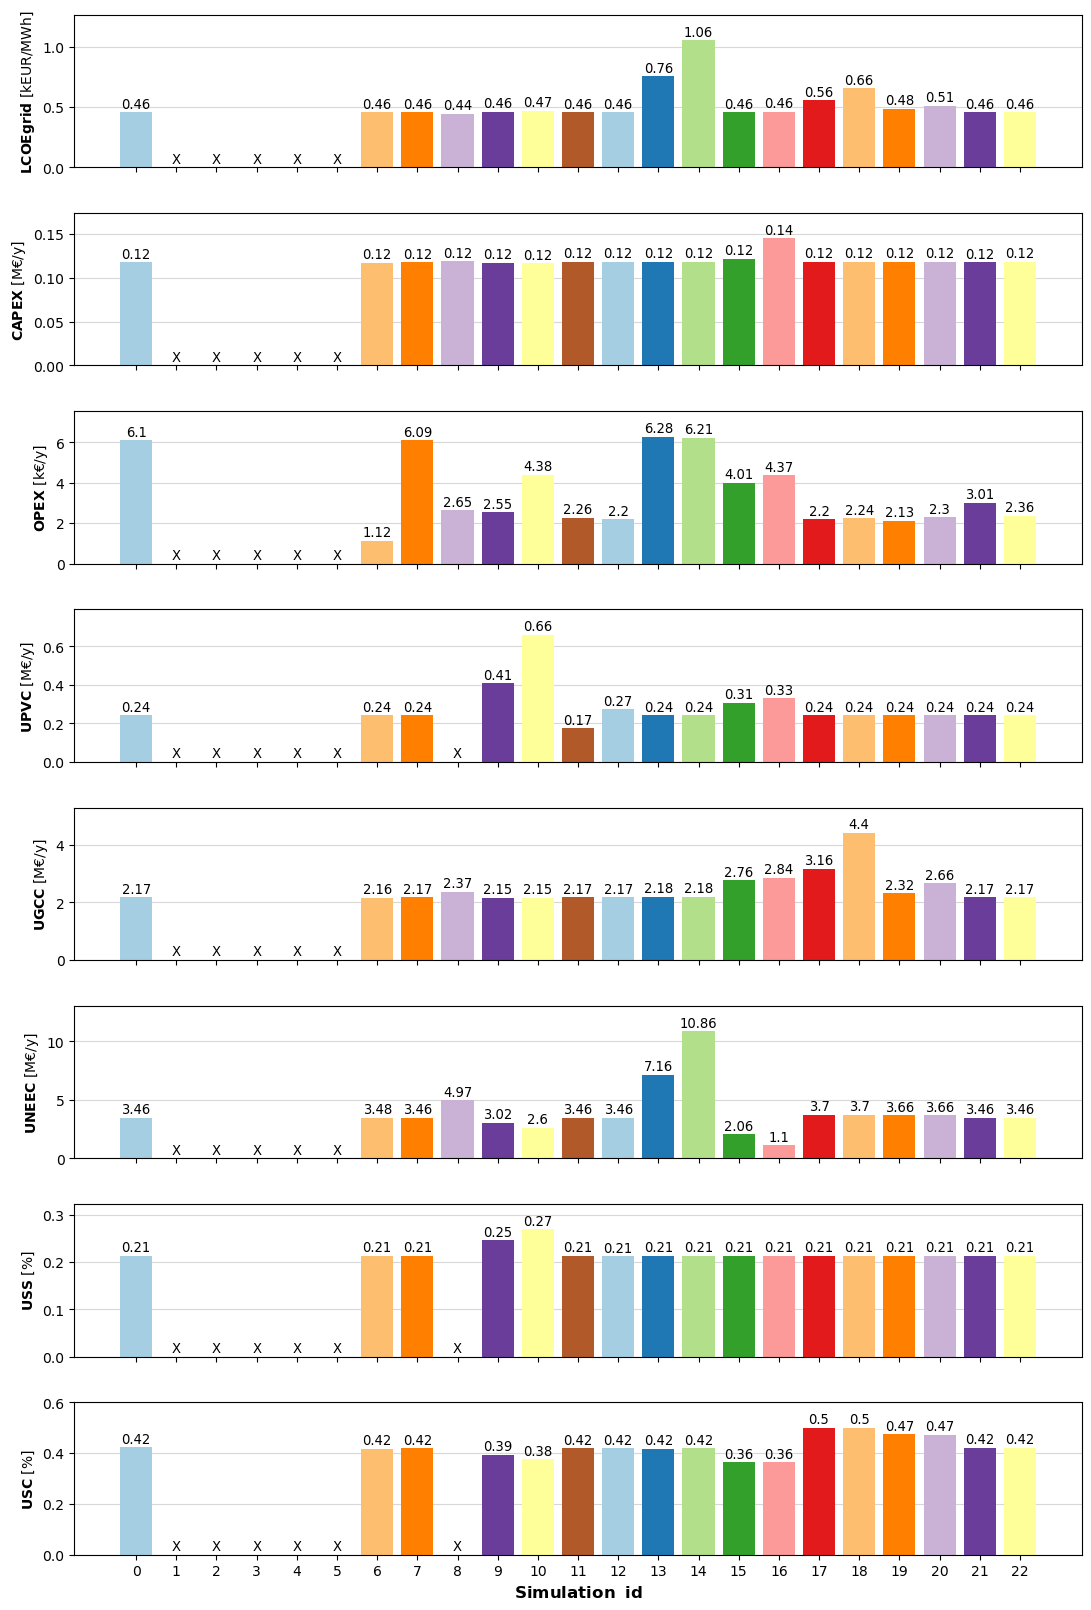

In [12]:
# -- Plot simulations with spanning tree constraints --
import math
import seaborn as sns

# Color palette
colors_smart = sns.color_palette("Paired", 23)

# -- Create plots --
grid_h = len(df_key_KPIs_spanning.columns)
grid_w = 1
fig = plt.figure(figsize = (13, 20))
gs  = gridspec.GridSpec(grid_h, grid_w, wspace = 0.05, hspace = 0.3, figure = fig)

factor = 5

# All the simulation indexes
index_simu = list(df_key_KPIs_spanning.index)

# Looping over each plots
for line, kpi in enumerate(df_key_KPIs_spanning.columns):
        
    # Creation of subplot
    ax = plt.subplot(gs[line, 0])
    ax.grid(visible=False, axis='x')
    ax.grid(visible=True, axis='y',alpha=0.5)
    ax.set_axisbelow(True)
    plt.xlabel(r"$\bf{Simulation \; \; id}$", fontsize = 12)
 
    # Fixing y scale
    # ax.set_ylim(bottom = -0.6, top = 1.1)            
    # ax.tick_params(axis = 'y', labelsize = 10)

    # Removing x-labels
    ax.set_xticks(best_results_solutions.index)
    ax.label_outer()
    
    # Values
    values = df_key_KPIs_spanning[kpi]

    vmax = 0
    vmin = 0

    # Looping over all the simulations
    for index_sim, val in enumerate(values):

        # FAILURE
        if val == "-" or val == -1000:
            val = 0
        
        # Making sure its a float
        val = float(val)
            
        # Plotting
        bars = ax.bar(index_sim, val, color = colors_smart[index_sim])

        # Updating y limits
        vmax = max(vmax, val)
        vmin = min(vmin, val)

        # Beautifier
        beau_name = "X" if val == 0.0 else round(val, 2)

        # Adding a nice ass looking text on top of the bar
        for bar in bars:
            height = bar.get_height()
            ax.annotate(beau_name, xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
            textcoords="offset points", ha='center', va='bottom', fontsize = 9.5)  

        ax.set_ylim(bottom = vmin, top = vmax * (1 + 1/factor))
      
    # Adding title with term
    plt.ylabel(r"$\bf{" + kpi[0] + r"}$" + f" [{kpi[1]}]", fontsize = 10)
    #spacing = 0.100
    #.subplots_adjust(bottom=spacing)

plt.savefig(f"kpi_spanning.pdf", bbox_inches='tight')

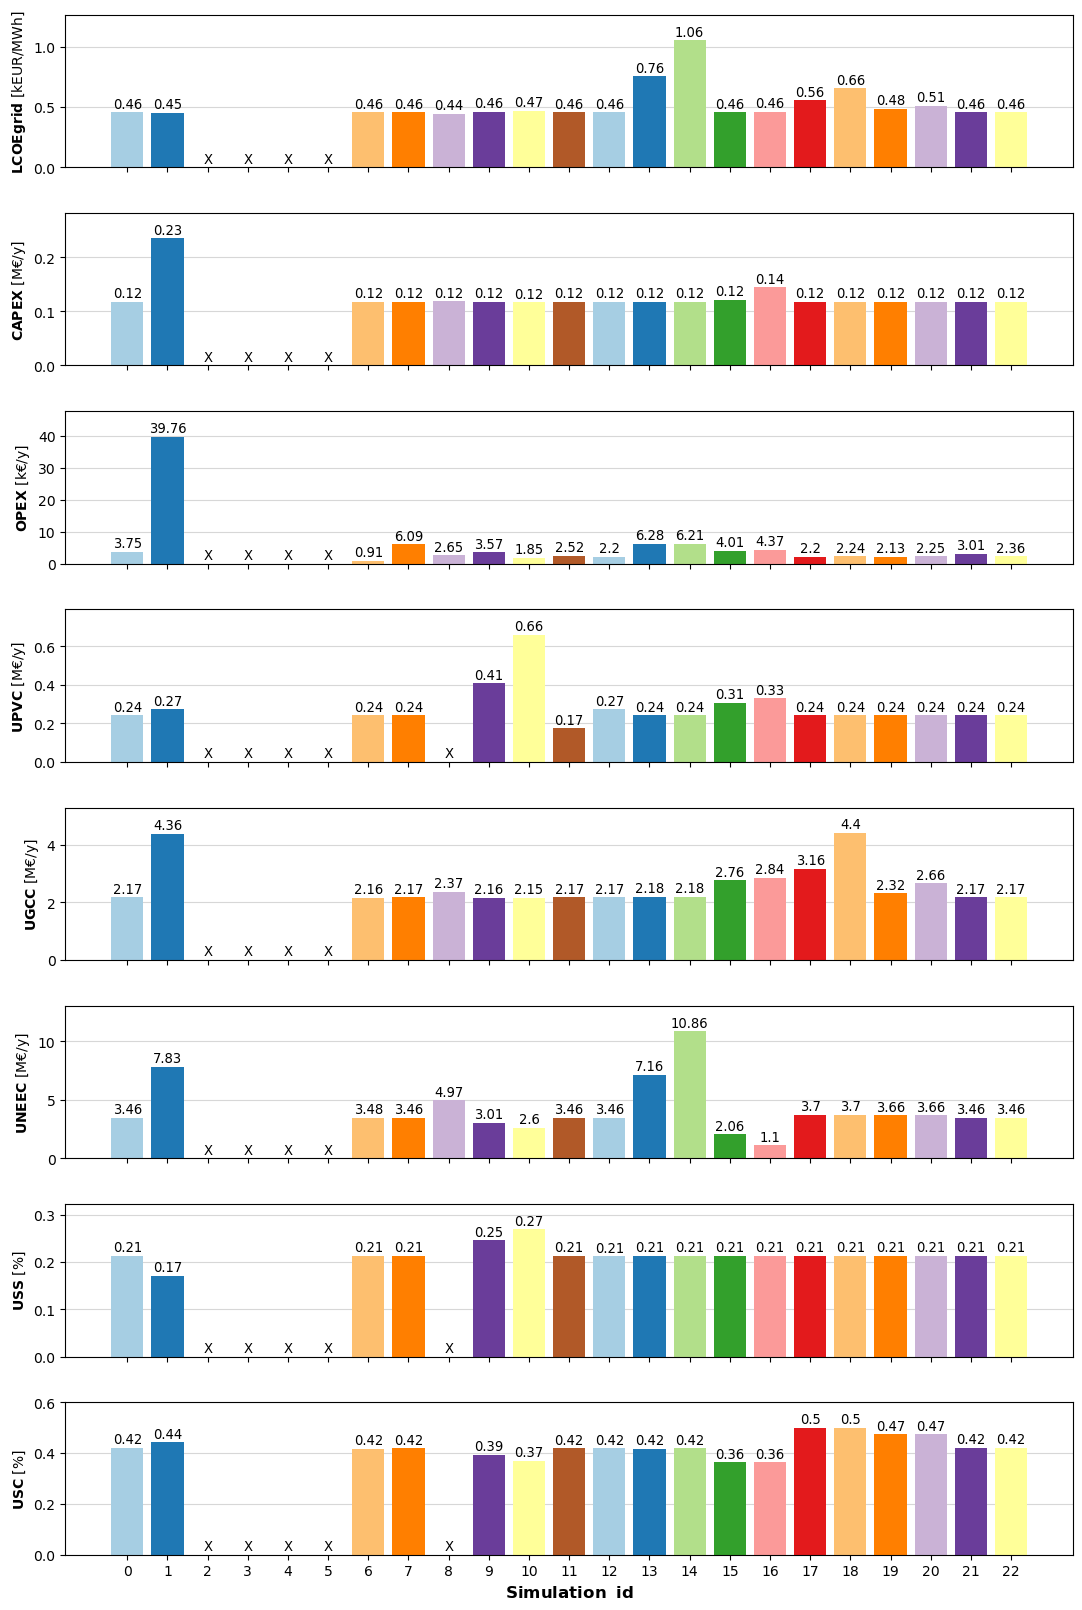

In [11]:
# -- Plot simulations with best results --
import math
import seaborn as sns

# Color palette
colors_smart = sns.color_palette("Paired", 23)

# -- Create plots --
grid_h = len(df_key_KPIs_multi.columns)
grid_w = 1
fig = plt.figure(figsize = (13, 20))
gs  = gridspec.GridSpec(grid_h, grid_w, wspace = 0.05, hspace = 0.3, figure = fig)

factor = 5

# All the simulation indexes
index_simu = list(best_results_solutions.index)

# Looping over each plots
for line, kpi in enumerate(best_results_solutions.columns):
        
    # Creation of subplot
    ax = plt.subplot(gs[line, 0])
    ax.grid(visible=False, axis='x')
    ax.grid(visible=True, axis='y',alpha=0.5)
    ax.set_axisbelow(True)
    plt.xlabel(r"$\bf{Simulation \; \; id}$", fontsize = 12)
 
    # Fixing y scale
    # ax.set_ylim(bottom = -0.6, top = 1.1)            
    # ax.tick_params(axis = 'y', labelsize = 10)

    # Removing x-labels
    ax.set_xticks(best_results_solutions.index)
    ax.label_outer()
    
    # Values
    values = best_results_solutions[kpi]

    vmax = 0
    vmin = 0

    # Looping over all the simulations
    for index_sim, val in enumerate(values):

        # FAILURE
        if val == "-" or val == -1000:
            val = 0
        
        # Making sure its a float
        val = float(val)
            
        # Plotting
        bars = ax.bar(index_sim, val, color = colors_smart[index_sim])

        # Updating y limits
        vmax = max(vmax, val)
        vmin = min(vmin, val)

        # Beautifier
        beau_name = "X" if val == 0.0 else round(val, 2)

        # Adding a nice ass looking text on top of the bar
        for bar in bars:
            height = bar.get_height()
            ax.annotate(beau_name, xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
            textcoords="offset points", ha='center', va='bottom', fontsize = 9.5)  

        ax.set_ylim(bottom = vmin, top = vmax * (1 + 1/factor))
      
    # Adding title with term
    plt.ylabel(r"$\bf{" + kpi[0] + r"}$" + f" [{kpi[1]}]", fontsize = 10)
    #spacing = 0.100
    #.subplots_adjust(bottom=spacing)

plt.savefig(f"kpi_best.pdf", bbox_inches='tight')
